In [1]:
pip install torch torchvision


Note: you may need to restart the kernel to use updated packages.


In [3]:
import torch
from torchvision.models.detection import ssd300_vgg16

# Load the pre-trained SSD model
model = ssd300_vgg16(pretrained=True)

# Set the model to evaluation mode
model.eval()


C:\Users\13604\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\13604\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SSD300_VGG16_Weights.COCO_V1`. You can also use `weights=SSD300_VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/ssd300_vgg16_coco-b556d3b4.pth" to C:\Users\13604/.cache\torch\hub\checkpoints\ssd300_vgg16_coco-b556d3b4.pth
100%|███████████████████████████████████████████████████████████████████████████████| 136M/136M [00:03<00:00, 42.5MB/s]


SSD(
  (backbone): SSDFeatureExtractorVGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=

In [17]:
from PIL import Image
from torchvision.transforms import functional as F

# Load an image
image_path = 'Tetra.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
image = F.to_tensor(image)
image = F.resize(image, (300, 300))  # Resize to match the model's expected input
image = image.unsqueeze(0)  # Add batch dimension


In [19]:
with torch.no_grad():
    predictions = model(image)

# `predictions` will contain the bounding boxes, labels, and scores


In [21]:
# Assuming class labels and bounding boxes are output from the model
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    label = predictions[0]['labels'][i]
    if score > 0.5:  # Threshold to filter out lower confidence detections
        print(f"Label: {label}, Score: {score}, Box: {box}")


In [43]:
import json
import requests

# Fetch COCO labels from a common source
COCO_LABELS_URL = "https://raw.githubusercontent.com/amikelive/coco-labels/master/coco-labels-2014_2017.txt"
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Then map these labels in your plotting code:
label_name = labels[label] if label < len(labels) else 'Unknown'


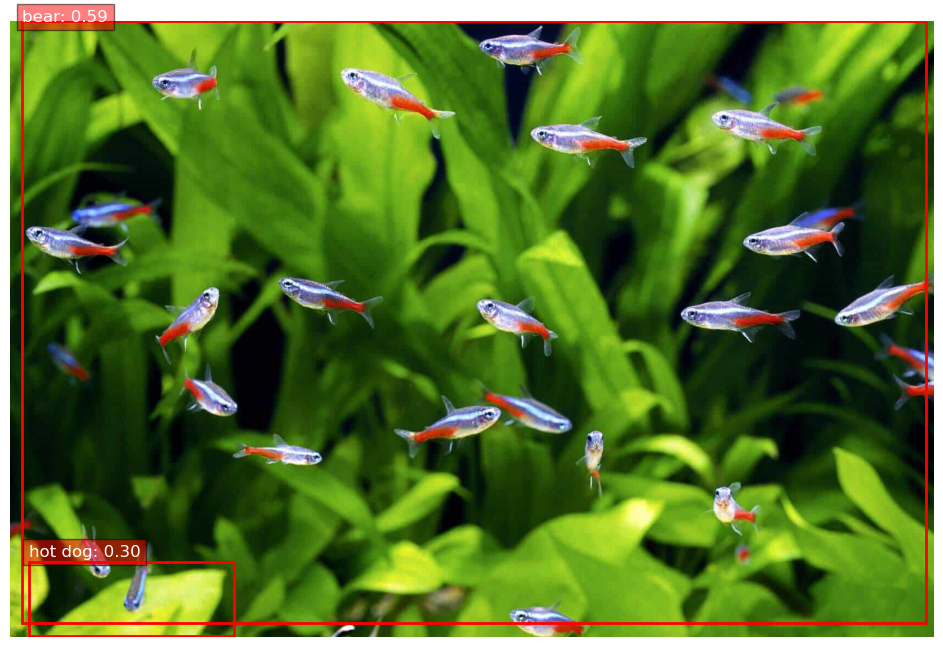

Inference Time: 2005.08 ms


In [80]:

image_path = 'Tetra.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()


start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")


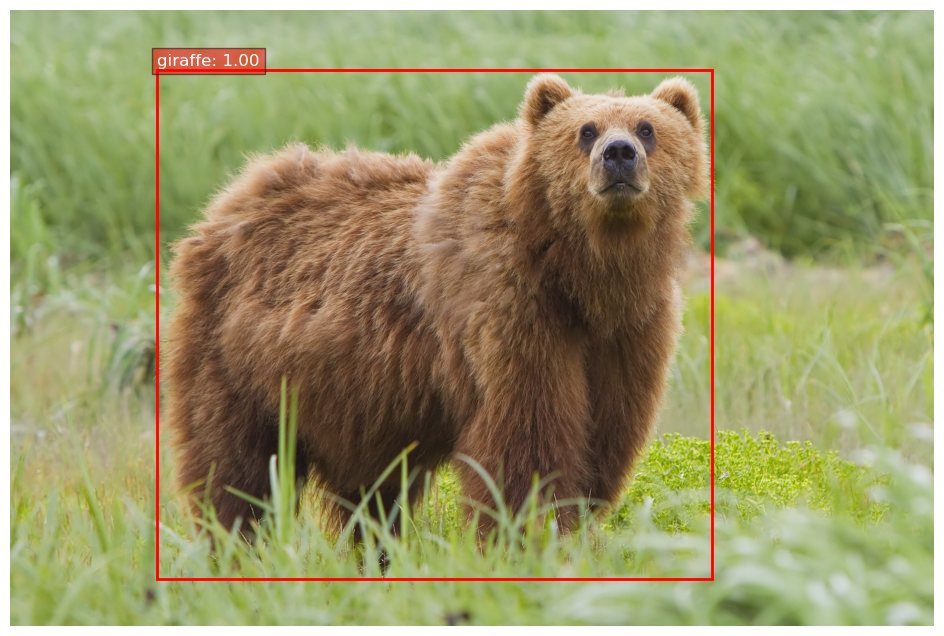

Inference Time: 1984.21 ms


In [81]:

image_path = 'Bear.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

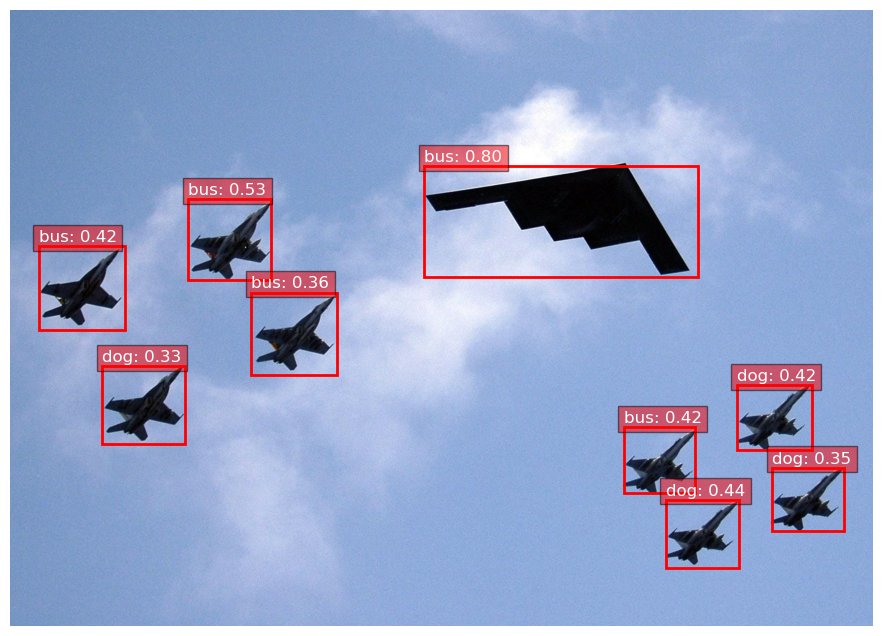

Inference Time: 2592.01 ms


In [82]:

image_path = 'Jets.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

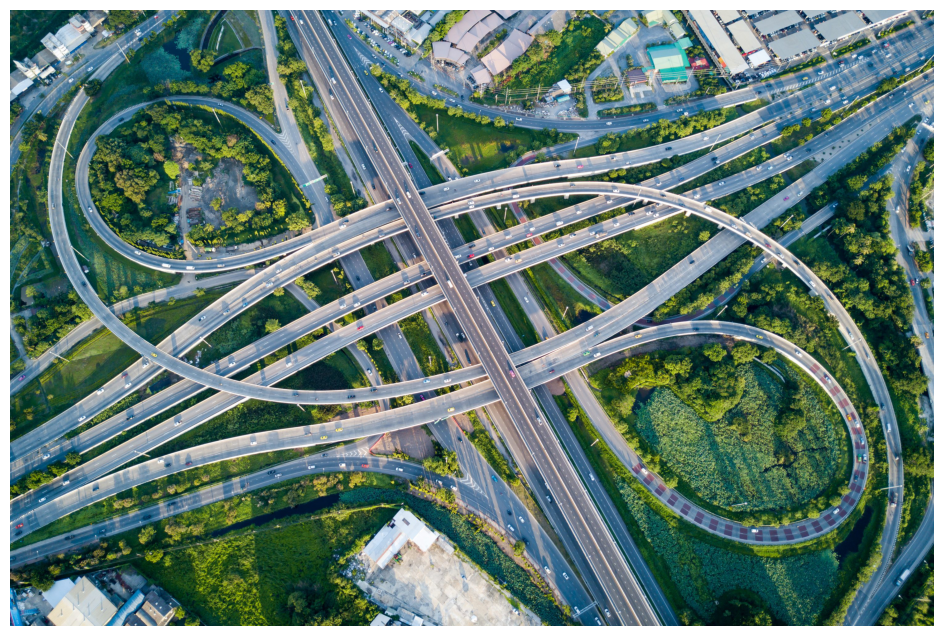

Inference Time: 2646.60 ms


In [83]:

image_path = 'highway.jpeg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

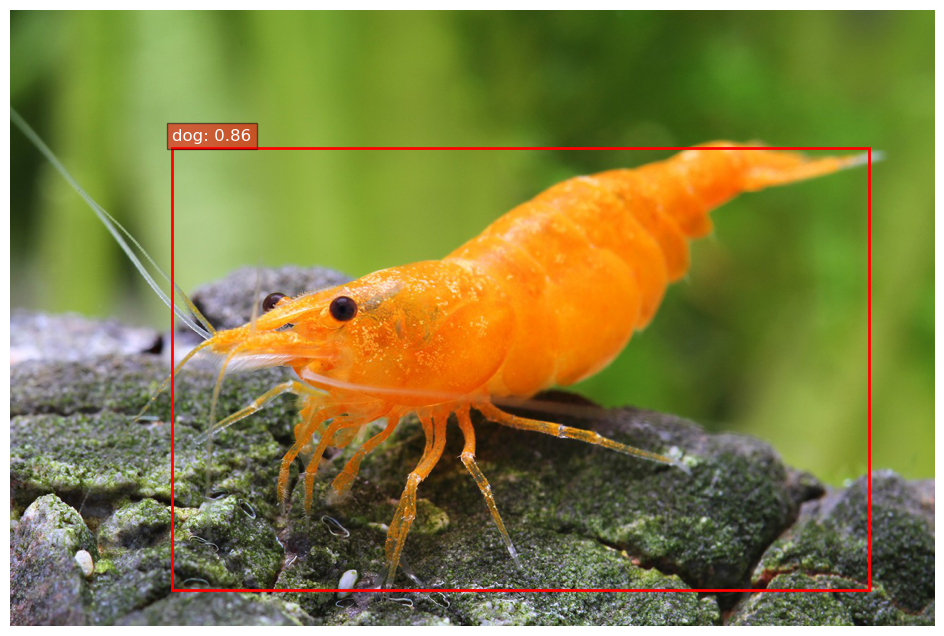

Inference Time: 1994.95 ms


In [84]:

image_path = 'Shrimp.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

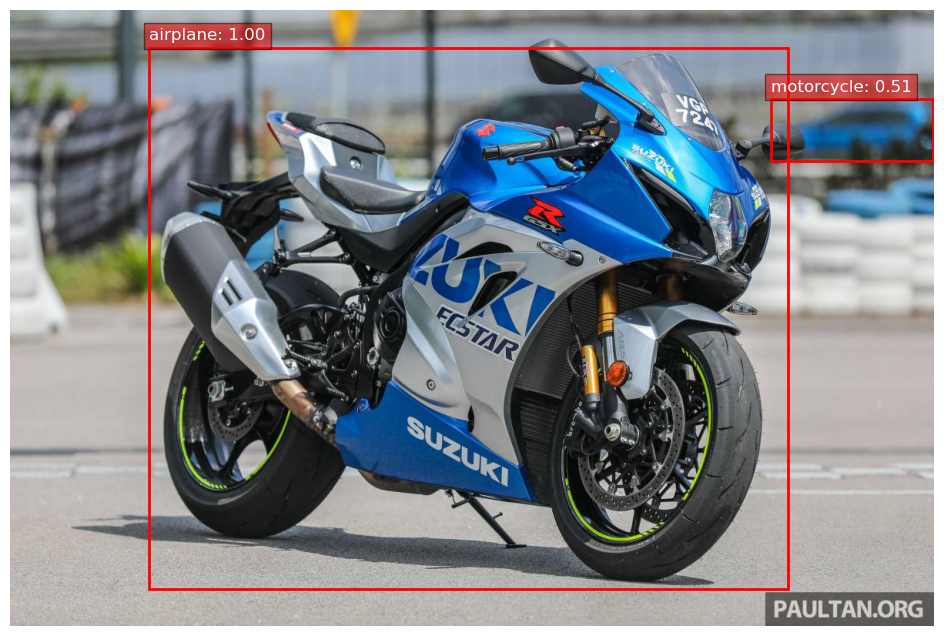

Inference Time: 2333.29 ms


In [85]:

image_path = 'gsxr.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

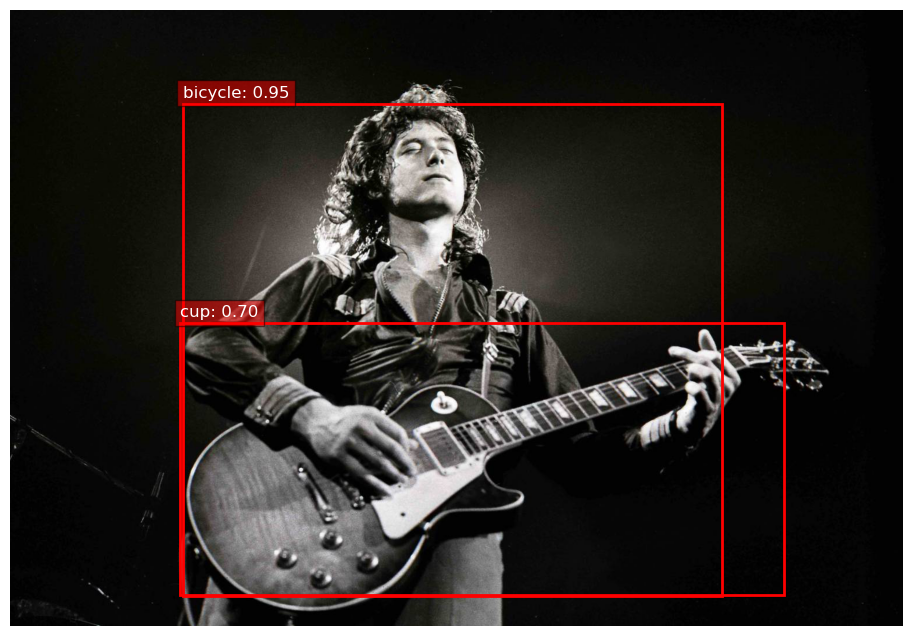

Inference Time: 2284.43 ms


In [86]:

image_path = 'page.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

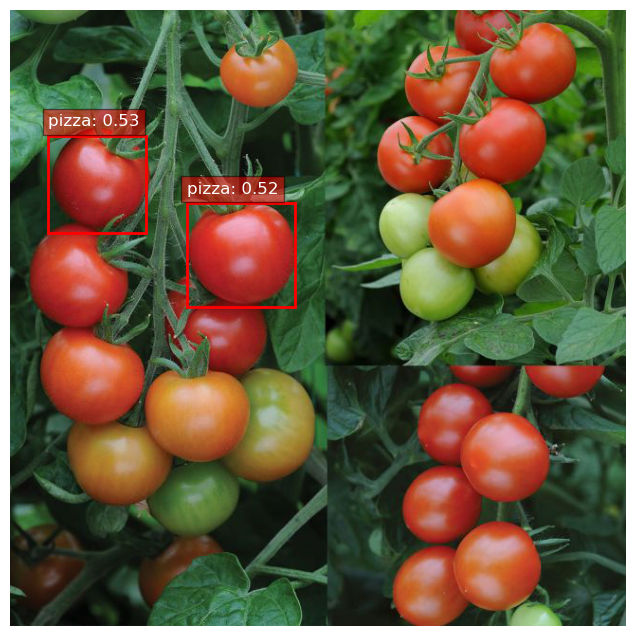

Inference Time: 2484.41 ms


In [87]:

image_path = 'tomatoe.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  # Get label as an integer
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
        # Draw the bounding box
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
        # Add the label and score as text
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time()  # Start time
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  # Total time taken

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")

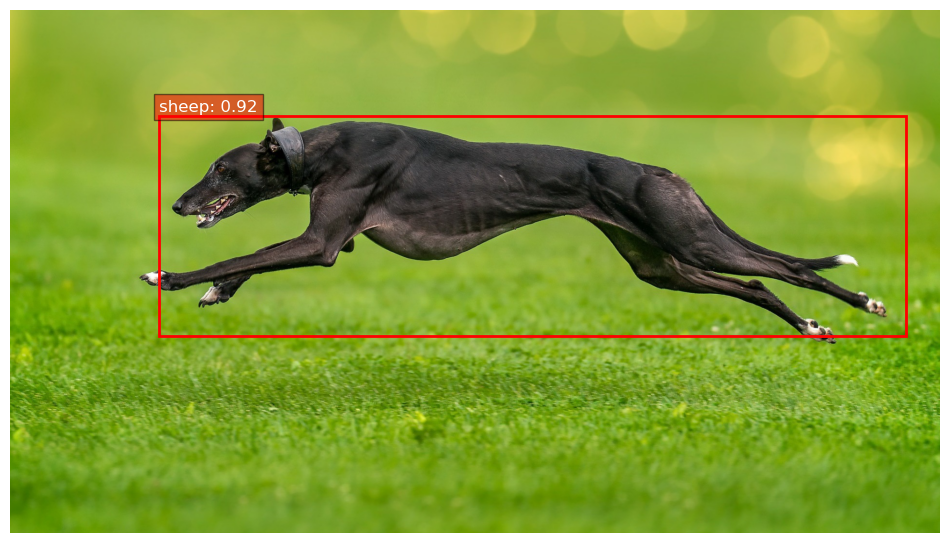

Inference Time: 1885.13 ms


In [88]:

image_path = 'greyhound.jpg'
image = Image.open(image_path).convert("RGB")

# Transform the image for the model
input_image = F.to_tensor(image)
input_image = input_image.unsqueeze(0)  # Add batch dimension

# Perform detection
with torch.no_grad():
    predictions = model(input_image)

# Prepare the image for drawing
fig, ax = plt.subplots(1, figsize=(12, 8))
ax.imshow(image)

# Labels fetched from the URL or hardcoded
labels = requests.get(COCO_LABELS_URL).text.split('\n')

# Extract predictions with a confidence threshold
confidence_threshold = 0.3
for i in range(len(predictions[0]['boxes'])):
    box = predictions[0]['boxes'][i]
    score = predictions[0]['scores'][i]
    if score > confidence_threshold:
        x_min, y_min, x_max, y_max = box.tolist()
        
        label = predictions[0]['labels'][i].item()  
        label_name = labels[label] if label < len(labels) else 'Unknown'
        
       
        rect = patches.Rectangle(
            (x_min, y_min),
            x_max - x_min,
            y_max - y_min,
            linewidth=2,
            edgecolor='red',
            facecolor='none'
        )
        ax.add_patch(rect)
        
      
        ax.text(
            x_min,
            max(y_min - 10, 0),
            f"{label_name}: {score:.2f}",
            color='white',
            fontsize=12,
            bbox=dict(facecolor='red', alpha=0.5)
        )

plt.axis("off")
plt.show()

start_time = time.time() 
with torch.no_grad():
    predictions = model(input_image)
elapsed_time = time.time() - start_time  

print(f"Inference Time: {elapsed_time * 1000:.2f} ms")